### Exercise on K-Means Clustering ### 
***Author: Umema A. Siddiqi***

****Date: Feb 17, 2025****


In [15]:
# Install required libraries
%matplotlib inline

In [47]:
# Install required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [19]:
# to make a dataset
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 400, centers = 5, cluster_std = 0.60, random_state = 0)

# make_blobs is generating isotropic Guassian blobs for clustering

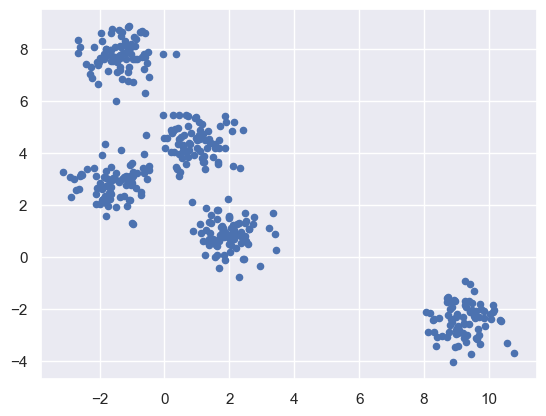

In [21]:
plt. scatter(X[:,0], X[:,1], s=20);
plt.show()

In [23]:
# Make an object of K-Means along with providing number of clusters, train the model and do the prediction
kmeans = KMeans (n_clusters = 5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

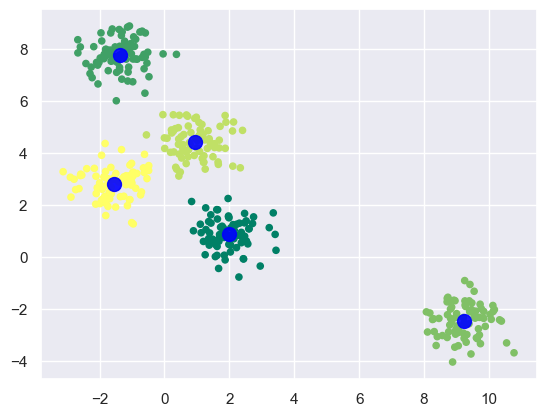

In [25]:
# to get the centers of the clusters
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=20, cmap = 'summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='blue', s=100, alpha=0.9)
plt.show()

In [27]:
#Example:
#Load the digit dataset from scikit learn
#Data has 1797 samples with 64 features

from sklearn.datasets import load_digits
digit = load_digits()
digit.data.shape

(1797, 64)

In [29]:
#to see the type of the dataset
type(digit)

sklearn.utils._bunch.Bunch

In [31]:
kmeans = KMeans (n_clusters = 10, random_state =0)
clusters = kmeans.fit_predict(digit.data)
kmeans.cluster_centers_.shape

# it means that there are 10 clusters with 64 features

(10, 64)

In [37]:
# Let's use some data viz techniques to understand our data
fig, ax = plt.subplots(2,5,figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10,8,8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation = 'nearest', cmap=plt.cm.binary)

#imshow is used to see the images

In [41]:
from scipy.stats import mode
label = np.zeros_like(clusters)
for i in range (10):
    mask = (clusters ==i)
    label[mask] = mode(digit.target[mask])[0]
    

In [45]:
# to check the accuracy of our model
from sklearn.metrics import accuracy_score
accuracy_score(digit.target, label)

0.7440178074568725

In [51]:
# K-Means Clustering on mall Customers Dataset
#Import the dataset
dataset = pd.read_csv('C:/Users/PC/Downloads/Mall_Customers.csv')

In [53]:
#to see the initial dataset
dataset.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [57]:
dataset.tail()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [61]:
#to find the number of rows and columns
dataset.shape

(200, 5)

In [63]:
#to describe the data
dataset.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [65]:
#to check the data for missing values
dataset.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [69]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

In [73]:
#Let's do clustering on Annual Income and Spending Score
data = dataset[['Annual_Income_(k$)', 'Spending_Score']]
data

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [75]:
data.values #to get values only and not column names

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [81]:
#we assume the max number of our clusters is 10. 
# to get the particular k value, we will use the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wc_ss = []
for i in range(1,11):
    kmeans_clu = KMeans(n_clusters = i, random_state = 56)
    kmeans_clu.fit(X)
    #inertia method returns wcss for that model
    wc_ss.append(kmeans_clu.inertia_)


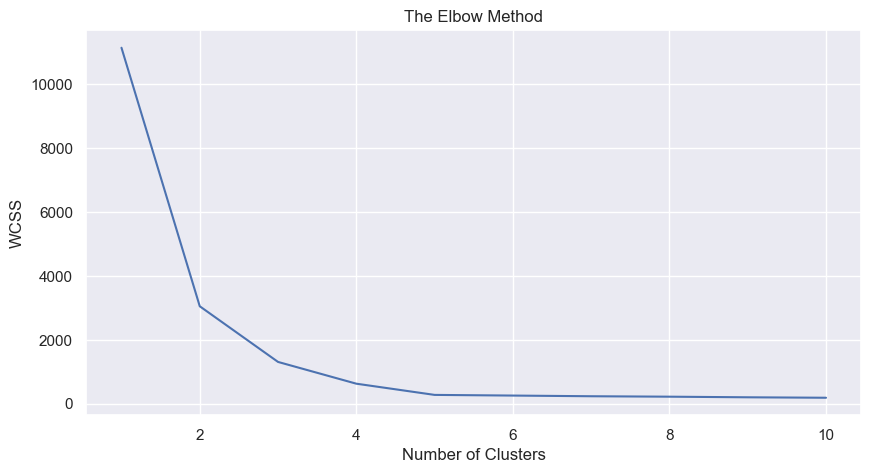

In [83]:
#to plot the elbow
plt.figure(figsize= (10,5))
plt.plot(range(1,11), wc_ss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [93]:
# it shows that the elbow comes at 5

#Now we will fit the K-Means to the dataset
kmeans = KMeans(n_clusters = 5, random_state=42)
y_kmeans = kmeans.fit_predict(X)


In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(digit.target, label)

0.7440178074568725

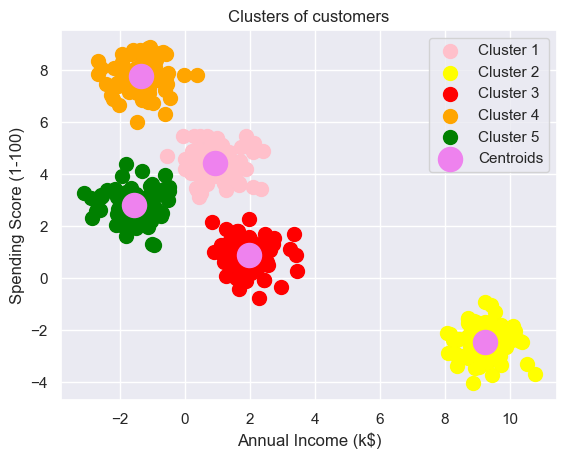

In [97]:
# to Visualize
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'green', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'violet', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
